In [8]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv', index_col=0)

df.head()

,State,County,City,datetime,Humidity,Temperature,Pressure,Wind_speed,Wind_direction,Weather_description,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,New Mexico,Bernalillo,Albuquerque,2012-10-01,48.909091,12.326208,1024.000000,4.000000,360.000000,sky is clear,10.441667,21.0,0.037792,43.0,0.483334,0.0,0.107396,2.0
1,New Mexico,Bernalillo,Albuquerque,2012-10-02,40.363636,16.621821,1022.772727,3.166667,303.458333,sky is clear,10.416667,29.0,0.029458,41.0,0.556250,0.0,0.137020,2.0
2,New Mexico,Bernalillo,Albuquerque,2012-10-03,31.904762,18.055417,1021.666667,2.958333,132.708333,few clouds,17.575000,40.0,0.022042,32.0,0.875000,4.0,0.248854,5.0
3,New Mexico,Bernalillo,Albuquerque,2012-10-04,19.681818,19.946250,1018.318182,1.916667,144.541667,few clouds,18.612500,46.0,0.036542,44.0,0.835417,3.0,0.208396,3.0
4,New Mexico,Bernalillo,Albuquerque,2012-10-05,18.250000,19.679167,1020.850000,2.583333,225.875000,scattered clouds,12.504167,25.0,0.037125,39.0,0.641666,0.0,0.121688,2.0


In [9]:
len(df)

17184

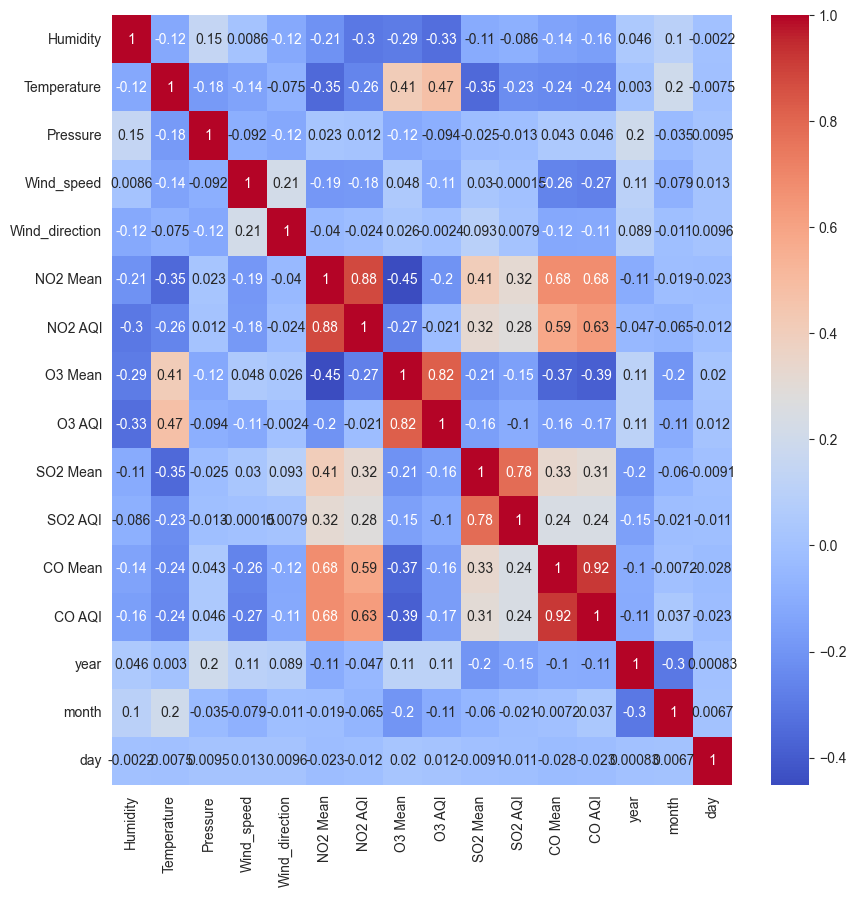

In [31]:
# feature correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('cleaned_data.csv', index_col=0)

# Preprocessing
# Convert 'datetime' to datetime object and extract year, month, day
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data = data.drop(columns=['datetime'])

# Handling categorical data - Encoding 'State', 'County', 'City', 'Weather_description'
categorical_features = ['State', 'County', 'City', 'Weather_description']
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('NO2 AQI')  # Target variable

# Impute missing values in numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])

# If there are any remaining missing values, drop those rows
data = data.dropna()

data.head()

,State,County,City,Humidity,Temperature,Pressure,Wind_speed,Wind_direction,Weather_description,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,year,month,day
0,New Mexico,Bernalillo,Albuquerque,48.909091,12.326208,1024.000000,4.000000,360.000000,sky is clear,10.441667,21.0,0.037792,43.0,0.483334,0.0,0.107396,2.0,2012.0,10.0,1.0
1,New Mexico,Bernalillo,Albuquerque,40.363636,16.621821,1022.772727,3.166667,303.458333,sky is clear,10.416667,29.0,0.029458,41.0,0.556250,0.0,0.137020,2.0,2012.0,10.0,2.0
2,New Mexico,Bernalillo,Albuquerque,31.904762,18.055417,1021.666667,2.958333,132.708333,few clouds,17.575000,40.0,0.022042,32.0,0.875000,4.0,0.248854,5.0,2012.0,10.0,3.0
3,New Mexico,Bernalillo,Albuquerque,19.681818,19.946250,1018.318182,1.916667,144.541667,few clouds,18.612500,46.0,0.036542,44.0,0.835417,3.0,0.208396,3.0,2012.0,10.0,4.0
4,New Mexico,Bernalillo,Albuquerque,18.250000,19.679167,1020.850000,2.583333,225.875000,scattered clouds,12.504167,25.0,0.037125,39.0,0.641666,0.0,0.121688,2.0,2012.0,10.0,5.0


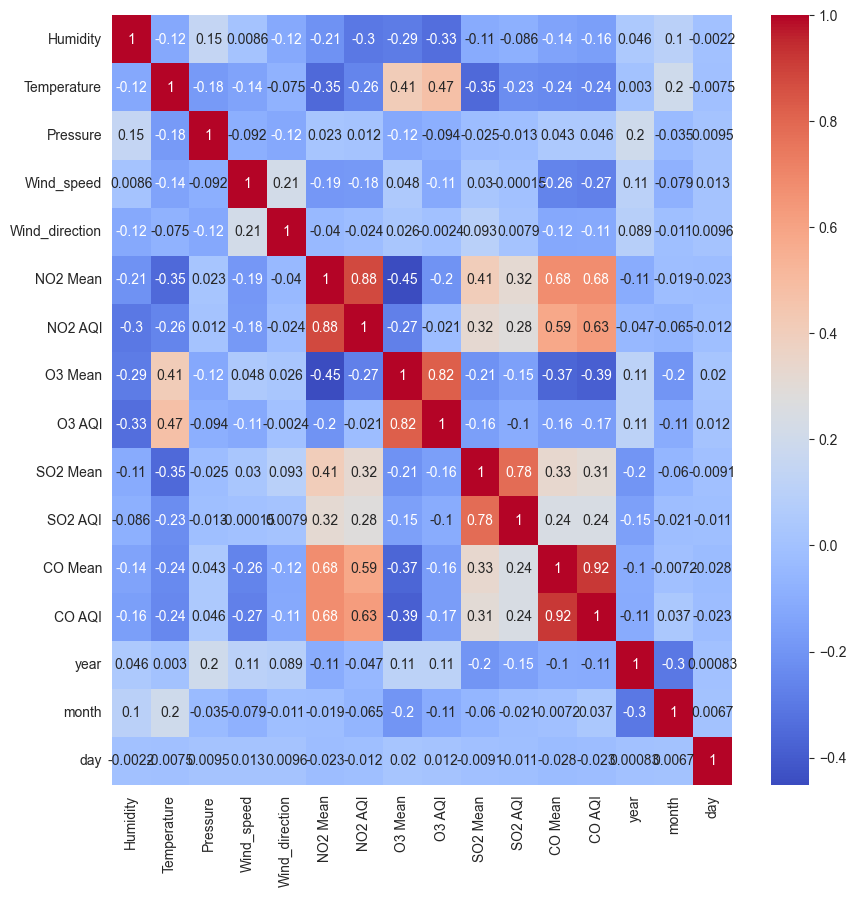

In [28]:
# Heatmap of correlation between features without target variable
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [26]:
# Preprocessor for pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Splitting the data into features and target
X = data.drop('NO2 AQI', axis=1)
y = data['NO2 AQI']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a pipeline with preprocessing and linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Training the model
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}')

# R-squared
r2 = model.score(X_test, y_test)
print(f'R-squared: {r2}')

Root Mean Squared Error: 5.153547772884272
Mean Absolute Percentage Error: 20.34412071767541
R-squared: 0.8289792857485594


In [18]:
df.describe()

,Humidity,Temperature,Pressure,Wind_speed,Wind_direction,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,year,month,day
count,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000
mean,64.451233,13.426089,1018.709393,2.561234,177.927943,14.276068,25.926187,0.023871,33.612179,0.951692,3.177796,0.309596,5.010824,2013.953329,6.555226,15.702514
std,18.741272,9.521558,13.202059,1.560196,69.035931,8.247995,12.730394,0.010163,15.885912,1.129709,5.865459,0.171391,3.421165,1.059114,3.587335,8.806412
min,5.000000,-19.157562,820.333333,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,-1.725155,0.000000,-0.047917,0.000000,2012.000000,1.000000,1.000000
25%,52.833333,6.481945,1013.500000,1.375000,129.583333,8.083333,16.000000,0.016417,24.000000,0.246280,0.000000,0.201143,3.000000,2013.000000,3.000000,8.000000
50%,66.958333,13.949813,1018.958333,2.291667,180.250000,12.507263,25.000000,0.023458,31.000000,0.662306,1.000000,0.263274,4.000000,2014.000000,7.000000,16.000000
75%,78.252717,20.809413,1025.250000,3.333333,227.041667,18.727746,34.000000,0.030878,41.000000,1.256250,4.000000,0.362368,6.000000,2015.000000,10.000000,23.000000
max,100.000000,38.664625,1084.250000,12.375000,360.000000,79.478261,108.000000,0.061542,182.000000,13.197916,108.000000,1.747917,50.000000,2016.000000,12.000000,31.000000


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Creating a new pipeline with the adjusted preprocessor and Random Forest Regressor
rfr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))])

# Training the Random Forest model
rfr_model.fit(X_train, y_train)

# Predicting and evaluating the Random Forest model
y_pred_rfr = rfr_model.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print(f'Root Mean Squared Error: {rmse_rfr}')

# Mean Absolute Percentage Error (MAPE)
mape_rfr = np.mean(np.abs((y_test - y_pred_rfr) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape_rfr}')

# R-squared
r2_rfr = rfr_model.score(X_test, y_test)
print(f'R-squared: {r2_rfr}')

Root Mean Squared Error: 4.719452191635997
Mean Absolute Percentage Error: 16.634626029968658
R-squared: 0.8565768405171349
